# GRADED CHALLENGE 2

#### KEZIA INTAN
#### BATCH 003

## DESCRIPTION

#### OBJECTIVE

I will try to apply what i've learn about statistic descriptive and inferential

#### PROBLEM STATEMENT

I will doing to cleaning the data from missing value, changing datatypes, compare between index. I want to see if index one is same with another one or not.

## WORKING AREA

#### Import libraries

First we have to import any libraries that we will use

In [1]:
import pandas as pd
import numpy as np
from numpy import percentile
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

### SQL QUERIES

##### Data Loading

Import the csv file which we had from google cloud query

In [2]:
df = pd.read_csv('GC2_Kezia Intan.csv')

In [3]:
df

,report_date,load_type,load_time,load_weight,dropoff_site
0,2021-07-08,TIRES,2021-07-08 12:00:00.000000 UTC,2260.0,MRF
1,2021-07-08,TIRES,2021-07-08 11:00:00.000000 UTC,1260.0,MRF
2,2021-07-08,TIRES,2021-07-08 03:00:00.000000 UTC,800.0,MRF
3,2021-05-01,TIRES,2021-05-01 12:29:00.000000 UTC,760.0,MRF
4,2021-07-03,TIRES,2021-07-03 12:09:00.000000 UTC,1400.0,MRF
...,...,...,...,...,...
26152,2021-03-01,ORGANICS,2021-03-01 11:26:00.000000 UTC,12100.0,ORGANICS BY GOSH
26153,2021-03-01,ORGANICS,2021-03-01 04:27:00.000000 UTC,10900.0,ORGANICS BY GOSH
26154,2021-03-01,ORGANICS,2021-03-01 05:55:00.000000 UTC,21800.0,ORGANICS BY GOSH
26155,2021-03-01,ORGANICS,2021-03-02 01:10:00.000000 UTC,5640.0,ORGANICS BY GOSH


In [4]:
df.head()

,report_date,load_type,load_time,load_weight,dropoff_site
0,2021-07-08,TIRES,2021-07-08 12:00:00.000000 UTC,2260.0,MRF
1,2021-07-08,TIRES,2021-07-08 11:00:00.000000 UTC,1260.0,MRF
2,2021-07-08,TIRES,2021-07-08 03:00:00.000000 UTC,800.0,MRF
3,2021-05-01,TIRES,2021-05-01 12:29:00.000000 UTC,760.0,MRF
4,2021-07-03,TIRES,2021-07-03 12:09:00.000000 UTC,1400.0,MRF


In [5]:
df.tail()

,report_date,load_type,load_time,load_weight,dropoff_site
26152,2021-03-01,ORGANICS,2021-03-01 11:26:00.000000 UTC,12100.0,ORGANICS BY GOSH
26153,2021-03-01,ORGANICS,2021-03-01 04:27:00.000000 UTC,10900.0,ORGANICS BY GOSH
26154,2021-03-01,ORGANICS,2021-03-01 05:55:00.000000 UTC,21800.0,ORGANICS BY GOSH
26155,2021-03-01,ORGANICS,2021-03-02 01:10:00.000000 UTC,5640.0,ORGANICS BY GOSH
26156,2021-03-01,RECYCLED METAL,2021-03-01 10:22:00.000000 UTC,360.0,AUSTIN IRON AND METAL


We have to see what types of our datas

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26157 entries, 0 to 26156
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   report_date   26157 non-null  object 
 1   load_type     26157 non-null  object 
 2   load_time     26157 non-null  object 
 3   load_weight   25109 non-null  float64
 4   dropoff_site  26157 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1021.9+ KB


### Data Prepocessing

Now we have to check if there is a missing values

In [7]:
df.isnull().sum()

report_date        0
load_type          0
load_time          0
load_weight     1048
dropoff_site       0
dtype: int64

There are some missing values, we will just fill it to 0 than drop the column

In [8]:
df['load_weight'].fillna('0', inplace = True)

Now there is no more missing value

In [9]:
df.isnull().sum()

report_date     0
load_type       0
load_time       0
load_weight     0
dropoff_site    0
dtype: int64

And we have to change the datatype of `report_date`

In [10]:
df['report_date'] = pd.to_datetime(df['report_date'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26157 entries, 0 to 26156
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   report_date   26157 non-null  datetime64[ns]
 1   load_type     26157 non-null  object        
 2   load_time     26157 non-null  object        
 3   load_weight   26157 non-null  object        
 4   dropoff_site  26157 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 1021.9+ KB


And also the  `load_weight`

In [12]:
convert = {'load_weight' : float}
df = df.astype(convert)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26157 entries, 0 to 26156
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   report_date   26157 non-null  datetime64[ns]
 1   load_type     26157 non-null  object        
 2   load_time     26157 non-null  object        
 3   load_weight   26157 non-null  float64       
 4   dropoff_site  26157 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 1021.9+ KB


Now we want to drop the `load_time` column because we don't need that

In [14]:
df.drop(['load_time'], axis = 1, inplace = True)

In [15]:
df

,report_date,load_type,load_weight,dropoff_site
0,2021-07-08,TIRES,2260.0,MRF
1,2021-07-08,TIRES,1260.0,MRF
2,2021-07-08,TIRES,800.0,MRF
3,2021-05-01,TIRES,760.0,MRF
4,2021-07-03,TIRES,1400.0,MRF
...,...,...,...,...
26152,2021-03-01,ORGANICS,12100.0,ORGANICS BY GOSH
26153,2021-03-01,ORGANICS,10900.0,ORGANICS BY GOSH
26154,2021-03-01,ORGANICS,21800.0,ORGANICS BY GOSH
26155,2021-03-01,ORGANICS,5640.0,ORGANICS BY GOSH


### Data Exploration

First we wanna see time span of the data that we have

In [16]:
df['report_date'].max()-df['report_date'].min()

Timedelta('189 days 00:00:00')

Then we wanna see the unique data

In [17]:
df.load_type.unique()

array(['TIRES', 'RECYCLING - SINGLE STREAM', 'SWEEPING', 'BRUSH',
       'GARBAGE COLLECTIONS', 'YARD TRIMMING', 'BULK', 'ORGANICS',
       'DEAD ANIMAL', 'MIXED LITTER', 'LITTER', 'RECYCLED METAL',
       'CONTAMINATED RECYCLING', 'CONTAMINATED ORGANICS'], dtype=object)

In [18]:
df.dropoff_site.unique()

array(['MRF', 'TDS - MRF', 'ONION CREEK', 'PARK CENTER', 'HORNSBY BEND',
       'TDS LANDFILL', 'GREAT NORTHERN', 'ORGANICS BY GOSH',
       'BALCONES RECYCLING', 'ON ROUTE HIGH DUMP',
       'AUSTIN IRON AND METAL', 'PARK BEND', 'BALCONES WOODS',
       'STEINER LANDFILL', 'WESTFIELD', 'ST. EDWARDS',
       'AUSTIN WOOD RECYCLING', 'WILCAB'], dtype=object)

In [19]:
df.nunique()

report_date      166
load_type         14
load_weight     1781
dropoff_site      18
dtype: int64

In [20]:
df['load_type'].value_counts()

GARBAGE COLLECTIONS          8242
RECYCLING - SINGLE STREAM    6760
ORGANICS                     5763
BULK                         1594
BRUSH                        1517
SWEEPING                     1390
MIXED LITTER                  329
TIRES                         175
DEAD ANIMAL                   150
YARD TRIMMING                 137
RECYCLED METAL                 57
LITTER                         41
CONTAMINATED RECYCLING          1
CONTAMINATED ORGANICS           1
Name: load_type, dtype: int64

### Central Tendency

We wanna see the maximum data

In [21]:
df['load_weight'].max()

245540.0

And also the minumum one

In [22]:
df['load_weight'].min()

0.0

Now we want calculate the mean, median, mode by `dropoff_site` column of our data

In [23]:
df.groupby(by = 'dropoff_site', sort = True)['load_weight'].mean()

dropoff_site
AUSTIN IRON AND METAL      451.200000
AUSTIN WOOD RECYCLING     4050.000000
BALCONES RECYCLING        9464.652072
BALCONES WOODS            8460.000000
GREAT NORTHERN            1641.714286
HORNSBY BEND              6616.628399
MRF                       1799.982143
ON ROUTE HIGH DUMP        1082.469136
ONION CREEK                  0.000000
ORGANICS BY GOSH         11789.731712
PARK BEND                13385.000000
PARK CENTER                  0.000000
ST. EDWARDS                  0.000000
STEINER LANDFILL           780.000000
TDS - MRF                 9872.550882
TDS LANDFILL             15165.151724
WESTFIELD                16020.000000
WILCAB                       0.000000
Name: load_weight, dtype: float64

In [24]:
df.groupby(by = 'dropoff_site', sort = True)['load_weight'].median()

dropoff_site
AUSTIN IRON AND METAL      400.0
AUSTIN WOOD RECYCLING     4050.0
BALCONES RECYCLING        9840.0
BALCONES WOODS            8460.0
GREAT NORTHERN               0.0
HORNSBY BEND              6380.0
MRF                       1360.0
ON ROUTE HIGH DUMP           0.0
ONION CREEK                  0.0
ORGANICS BY GOSH         11900.0
PARK BEND                12330.0
PARK CENTER                  0.0
ST. EDWARDS                  0.0
STEINER LANDFILL           780.0
TDS - MRF                10330.0
TDS LANDFILL             14920.0
WESTFIELD                16020.0
WILCAB                       0.0
Name: load_weight, dtype: float64

In [25]:
df['dropoff_site'].mode()

0    TDS LANDFILL
Name: dropoff_site, dtype: object

Now we have to choose which data we want to analyse the descriptive

In [26]:
df.groupby(by = 'dropoff_site', sort = True)['load_weight'].apply(pd.Series.mode).to_frame()

load_weight
dropoff_site                        
AUSTIN IRON AND METAL 0        260.0
                      1        320.0
                      2        520.0
AUSTIN WOOD RECYCLING 0       2340.0
                      1       5760.0
BALCONES RECYCLING    0      11880.0
BALCONES WOODS        0       8460.0
GREAT NORTHERN        0          0.0
HORNSBY BEND          0       5500.0
MRF                   0        960.0
ON ROUTE HIGH DUMP    0          0.0
ONION CREEK           0          0.0
ORGANICS BY GOSH      0      14580.0
PARK BEND             0       8480.0
                      1       8960.0
                      2      15700.0
                      3      20400.0
PARK CENTER           0          0.0
ST. EDWARDS           0          0.0
STEINER LANDFILL      0        780.0
TDS - MRF             0      10360.0
TDS LANDFILL          0         20.0
                      1         60.0
                      2      12020.0
WESTFIELD             0      16020.0
WILCAB                0          0.0

Here we want to see the total count of the `load_type` column

In [27]:
df['load_type'].value_counts()

GARBAGE COLLECTIONS          8242
RECYCLING - SINGLE STREAM    6760
ORGANICS                     5763
BULK                         1594
BRUSH                        1517
SWEEPING                     1390
MIXED LITTER                  329
TIRES                         175
DEAD ANIMAL                   150
YARD TRIMMING                 137
RECYCLED METAL                 57
LITTER                         41
CONTAMINATED RECYCLING          1
CONTAMINATED ORGANICS           1
Name: load_type, dtype: int64


Here we will use the `organics` data

In [28]:
organics = df.loc[df['load_type']=='ORGANICS']
organics

,report_date,load_type,load_weight,dropoff_site
546,2021-04-10,ORGANICS,20.0,TDS LANDFILL
547,2021-04-24,ORGANICS,500.0,TDS LANDFILL
555,2021-02-27,ORGANICS,20.0,TDS LANDFILL
558,2021-03-13,ORGANICS,180.0,TDS LANDFILL
563,2021-06-26,ORGANICS,60.0,TDS LANDFILL
...,...,...,...,...
26151,2021-03-01,ORGANICS,18580.0,ORGANICS BY GOSH
26152,2021-03-01,ORGANICS,12100.0,ORGANICS BY GOSH
26153,2021-03-01,ORGANICS,10900.0,ORGANICS BY GOSH
26154,2021-03-01,ORGANICS,21800.0,ORGANICS BY GOSH


Here to count the total data of `organics` data. There are five type data of organics

In [29]:
total_organics = organics.groupby(by = 'dropoff_site', sort = True)['load_weight'].sum() 
total_organics

dropoff_site
HORNSBY BEND             16160.0
ON ROUTE HIGH DUMP       87680.0
ORGANICS BY GOSH      67744966.0
PARK BEND                53540.0
TDS LANDFILL             28020.0
Name: load_weight, dtype: float64

This time we will use the `organics by gosh` data

In [30]:
gosh = df.loc[df['dropoff_site']=='ORGANICS BY GOSH']
gosh

,report_date,load_type,load_weight,dropoff_site
775,2021-02-21,ORGANICS,2480.0,ORGANICS BY GOSH
776,2021-03-14,ORGANICS,21700.0,ORGANICS BY GOSH
777,2021-03-21,ORGANICS,7120.0,ORGANICS BY GOSH
778,2021-02-21,ORGANICS,5560.0,ORGANICS BY GOSH
779,2021-03-14,ORGANICS,20460.0,ORGANICS BY GOSH
...,...,...,...,...
26151,2021-03-01,ORGANICS,18580.0,ORGANICS BY GOSH
26152,2021-03-01,ORGANICS,12100.0,ORGANICS BY GOSH
26153,2021-03-01,ORGANICS,10900.0,ORGANICS BY GOSH
26154,2021-03-01,ORGANICS,21800.0,ORGANICS BY GOSH


There are `5755` data of organics by gosh

In [31]:
gosh_percent = gosh.value_counts().sum()
gosh_percent

5755

In [32]:
organics.value_counts().sum()

5763

Now we want to find how much the total waste in organics by gosh

In [33]:
total_data = gosh_percent/organics.value_counts().sum() * 100
print(total_data, '%')

99.86118341141767 %


GOSH! There are 99% organics by gosh handled by in austin

Now see if there is any missing value in 'gosh'

In [34]:
gosh.isnull().sum()

report_date     0
load_type       0
load_weight     0
dropoff_site    0
dtype: int64

There isn't missing value

Now we have to make the data distribution by making a visualization like this down below

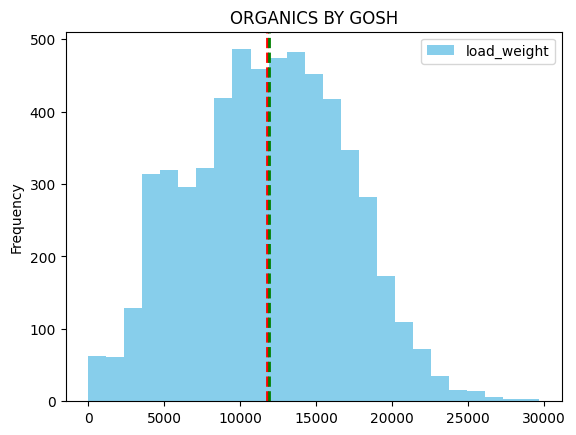

In [35]:
gosh.plot.hist(title='ORGANICS BY GOSH', color='skyblue', bins=25)  
plt.axvline(organics['load_weight'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(organics['load_weight'].median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

Check if there skew in the distribution

In [36]:
gosh['load_weight'].skew()

0.044088679506210454

There are 0,04 skewed but that is still okay, our data is normal

<AxesSubplot: ylabel='load_weight'>

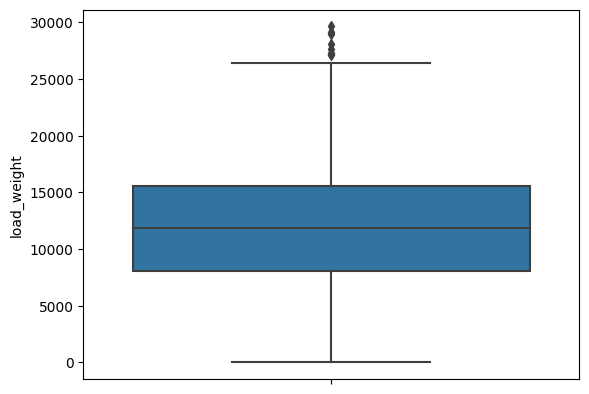

In [37]:
sns.boxplot(data=gosh, y = 'load_weight')

### Measure of variance

Then we have to see the mean, median, mode, variance, standar deviation of data that we have

In [38]:
gosh['load_weight'].mean()

11789.731711555169

In [39]:
gosh['load_weight'].median()

11900.0

In [40]:
gosh['load_weight'].mode()

0    14580.0
Name: load_weight, dtype: float64

In [41]:
gosh['load_weight'].var()

25989104.34371961

In [42]:
gosh['load_weight'].std()

5097.950994636924

And also the percentile and quartile

In [43]:
quartiles = percentile(gosh['load_weight'], [25, 50, 75])
gosh_min, gosh_max = gosh['load_weight'].min(), gosh['load_weight'].max()

q1 = quartiles[0]
q2 = quartiles[1]
q3 = quartiles[2]

In [44]:
print(gosh_min)
print(q1)
print(q2)
print(q3)
print(gosh_max)

0.0
8100.0
11900.0
15540.0
29660.0


Also check the extreme value

In [45]:
iqr = q3 - q1
upper = q3 + 3 * iqr
lower = q1 + 3 * iqr

In [46]:
print(iqr)
print(upper)
print(lower)

7440.0
37860.0
30420.0


### Outlier

After that we wanna see if there is any outliers from the upper boundary

In [47]:
gosh.loc[gosh['load_weight'] > 37860]

,report_date,load_type,load_weight,dropoff_site


Luckyly there is no outlier in our data so we don't have to drop the outlier

In [48]:
organics_percent = organics.loc[organics['load_weight'] > 37860].value_counts().sum()
organics_percent

0

There is no changes in our plot because there is no outlier that we have to drop

<AxesSubplot: ylabel='load_weight'>

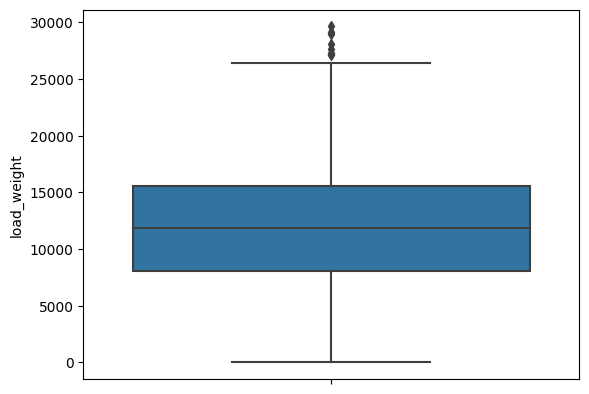

In [49]:
sns.boxplot(data=gosh, y = 'load_weight')

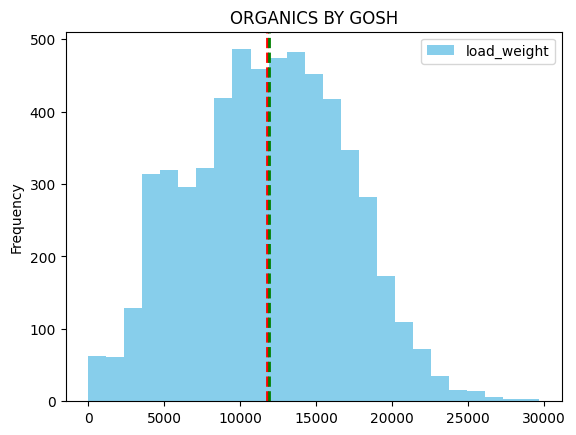

In [50]:
gosh.plot.hist(title='ORGANICS BY GOSH', color='skyblue', bins=25)  
plt.axvline(gosh['load_weight'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(gosh['load_weight'].median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

After drop the outlier we have to double check it, check the skew, mean, median, mode. But in this case the output will be the same like the first because there is no outlier

In [51]:
gosh['load_weight'].skew()

0.044088679506210454

In [52]:
gosh['load_weight'].mean()

11789.731711555169

In [53]:
gosh['load_weight'].median()

11900.0

In [54]:
gosh['load_weight'].mode()

0    14580.0
Name: load_weight, dtype: float64

In [55]:
gosh.apply(pd.Series.mode)

,report_date,load_type,load_weight,dropoff_site
0,2021-04-01,ORGANICS,14580.0,ORGANICS BY GOSH


Now we want to compare with the `austin iron and metal` datas

In [56]:
metal = df.loc[df['load_type']=='RECYCLED METAL']
metal

,report_date,load_type,load_weight,dropoff_site
1083,2021-07-08,RECYCLED METAL,320.0,AUSTIN IRON AND METAL
1314,2021-03-02,RECYCLED METAL,520.0,AUSTIN IRON AND METAL
1477,2021-03-03,RECYCLED METAL,8260.0,ORGANICS BY GOSH
2273,2021-03-08,RECYCLED METAL,350.0,AUSTIN IRON AND METAL
2529,2021-03-09,RECYCLED METAL,280.0,AUSTIN IRON AND METAL
2785,2021-03-10,RECYCLED METAL,500.0,AUSTIN IRON AND METAL
3025,2021-03-11,RECYCLED METAL,630.0,AUSTIN IRON AND METAL
3474,2021-03-15,RECYCLED METAL,1040.0,AUSTIN IRON AND METAL
4530,2021-03-22,RECYCLED METAL,5160.0,ORGANICS BY GOSH
4790,2021-03-23,RECYCLED METAL,290.0,AUSTIN IRON AND METAL


There are 50 datas here

In [57]:
metal['load_type'].value_counts()

RECYCLED METAL    57
Name: load_type, dtype: int64

Cause there is just only `austin iron and metal`  we will use that

In [58]:
ironman = metal.loc[metal['dropoff_site']=='AUSTIN IRON AND METAL']

Just follow the first step above

Count the mean, median, mode, variance, standar deviation

In [59]:
ironman['load_weight'].mean()

451.2

In [60]:
ironman['load_weight'].median()

400.0

In [61]:
ironman['load_weight'].mode()

0    260.0
1    320.0
2    520.0
Name: load_weight, dtype: float64

In [62]:
ironman['load_weight'].var()

46504.65306122449

In [63]:
ironman['load_weight'].std()

215.64937528595925

Making the distribution plot

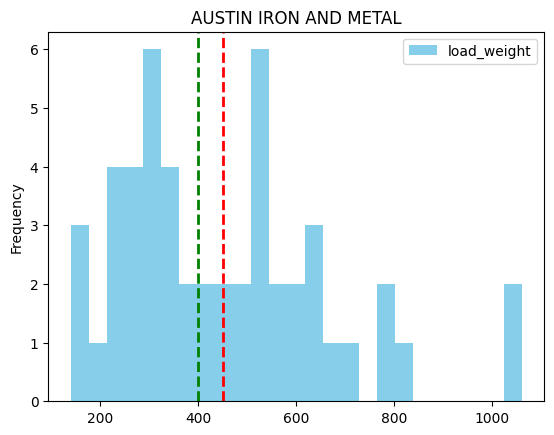

In [64]:
ironman.plot.hist(title='AUSTIN IRON AND METAL', color='skyblue', bins=25)  
plt.axvline(ironman['load_weight'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(ironman['load_weight'].median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

Check if there is a skew

In [65]:
ironman['load_weight'].skew()

0.8969633828989727

<AxesSubplot: ylabel='load_weight'>

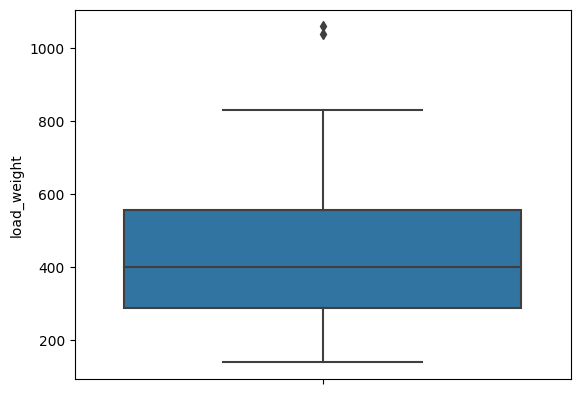

In [66]:
sns.boxplot(data = ironman, y = 'load_weight')

Also count the percenntile, quartile

In [67]:
quartiles = percentile(metal['load_weight'], [25, 50, 75])
ironman_min, ironman_max = ironman['load_weight'].min(), ironman['load_weight'].max()

q1 = quartiles[0]
q2 = quartiles[1]
q3 = quartiles[2]

In [68]:
print(ironman_min)
print(q1)
print(q2)
print(q3)
print(ironman_min)

140.0
290.0
460.0
630.0
140.0


And checking the extreme value

In [69]:
iqr = q3 - q1
upper = q3 + 3 * iqr
lower = q1 + 3 * iqr

In [70]:
print(iqr)
print(upper)
print(lower)

340.0
1650.0
1310.0


Here is also no outlier

In [71]:
ironman.loc[ironman['load_weight'] > 1360]

,report_date,load_type,load_weight,dropoff_site


<AxesSubplot: ylabel='load_weight'>

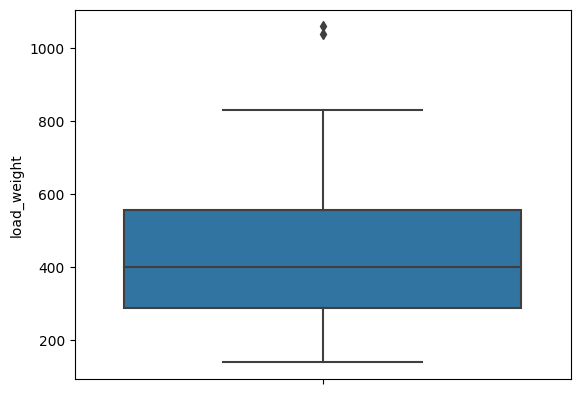

In [72]:
sns.boxplot(data = ironman, y = 'load_weight')

The skew is still same

In [73]:
ironman['load_weight'].skew()

0.8969633828989727

And the distribution plot too

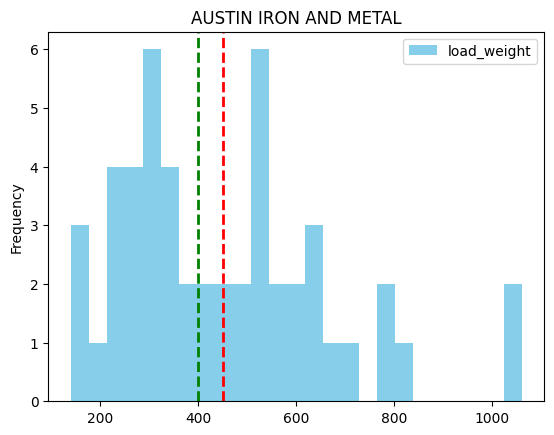

In [74]:
ironman.plot.hist(title='AUSTIN IRON AND METAL', color='skyblue', bins=25)  
plt.axvline(ironman['load_weight'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(ironman['load_weight'].median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

In [75]:
ironman['load_weight'].mean()

451.2

In [76]:
ironman['load_weight'].median()

400.0

In [77]:
ironman['load_weight'].mode()

0    260.0
1    320.0
2    520.0
Name: load_weight, dtype: float64

# PROBLEM 1

## HYPOTHESIS TESTING

### Our hypothesis testing (2S2T)
##### H0 : &mu; 'ORGANICS BY GOSH' load weight = &mu; 'AUSTIN IRON AND METAL' load weight
##### H1 : &mu; 'ORGANICS BY GOSH' load weight != &mu; 'AUSTIN IRON AND METAL' load weight

After we analyze and organize our two site which is `organics by gosh` and `asutin iron and metal`. We will use the T-test

In [78]:
t_stat, p_val = stats.ttest_ind(gosh['load_weight'],metal['load_weight'])

print(t_stat)
print(p_val)

15.190527060385643
3.8834001512651677e-51


11367.066702706126
12212.396720404211


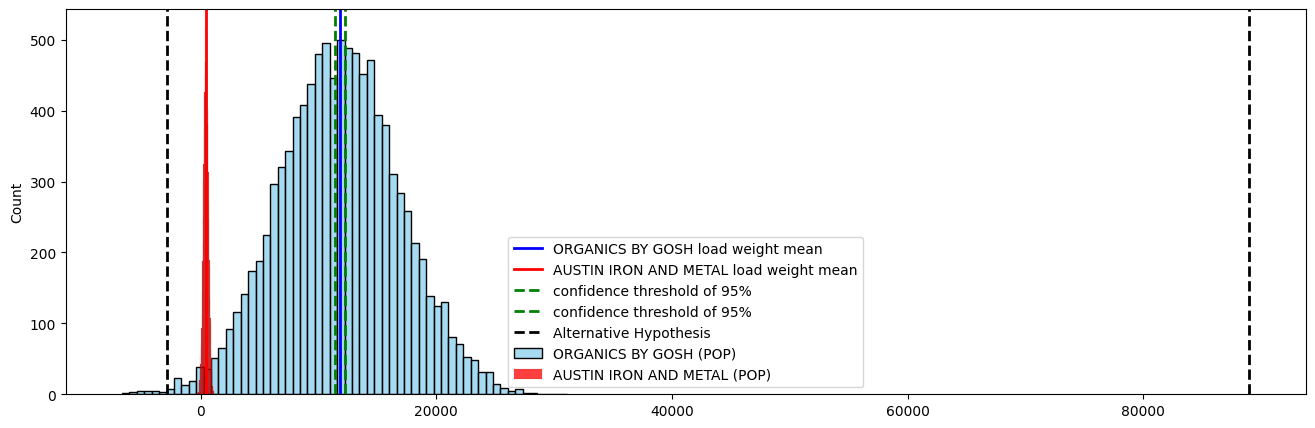

In [80]:
# simulation
gosh_pop = np.random.normal(gosh['load_weight'].mean(),gosh['load_weight'].std(),10000)
ironman_pop = np.random.normal(ironman['load_weight'].mean(),ironman['load_weight'].std(),10000)

# confidence interval based on BALCONS RECYLING
ci = stats.norm.interval(0.95, gosh['load_weight'].mean(), ironman['load_weight'].std())

plt.figure(figsize=(16,5))
sns.histplot(gosh_pop, label='ORGANICS BY GOSH (POP)',color='skyblue')
sns.histplot(ironman_pop, label='AUSTIN IRON AND METAL (POP)',color='red')

# mean
plt.axvline(gosh['load_weight'].mean(), color='blue', linewidth=2, label='ORGANICS BY GOSH load weight mean')
plt.axvline(ironman['load_weight'].mean(), color='red',  linewidth=2, label='AUSTIN IRON AND METAL load weight mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

# alternative hypotesis
plt.axvline(gosh_pop.mean()+t_stat*gosh_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(ironman_pop.mean()-t_stat*ironman_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()
print(ci[0])
print(ci[1])

We can conclude that we reject H0 because the `austin iron and metal` is not the same as `organics by gosh`

## QUESTIONS

1. Teknik apa yang kamu pilih untuk handling outlier? jelaskan alasannya!
2. Apa konsep dibalik confidence interval sehingga kita dapat menggunakannya untuk menyelesaikan langkah pada nomor 7?
3. Jelaskan jenis uji hipotesis apa yang kamu terapkan dan mengapa?

1. For handling the outliers I use the z-score technique. That is for finding the outliers from normal distribution

2. Confidence interval is for to know how accurate the interval of our site. Usually we use 95% of confidence level or people used to say &alpha; (alpha). By this 95 per 100 confidence level it's make us confiden too about our data to not to fall away between upper and lower values

3. I am using the 2 sample 2 tale because I want to know the average of load weight between `organics by gosh` and `austin iron and metal` is same or not. The hypothesis is proving that there is a significant difference between the two sites

# PROBLEM 2

We have formula like this to know how much load garbage in austin

W(tomorrow) = W(today) + V * delta t

First we grouping the data by date

In [82]:
f = df.groupby('report_date')['load_weight'].sum().to_frame()
f

,load_weight
report_date,
2021-01-01,0.0
2021-01-02,2170130.0
2021-01-04,2920260.0
2021-01-05,2388540.0
2021-01-06,2396550.0
...,...
2021-07-05,1897290.0
2021-07-06,1921640.0
2021-07-07,1553080.0


Now count the differential of our data and dividing with the differential of our data range

In [83]:
v = np.diff(f['load_weight'])/np.diff(range(166))
v

array([ 2.17013000e+06,  7.50130000e+05, -5.31720000e+05,  8.01000000e+03,
        4.17800000e+04, -5.93380000e+05, -1.81681000e+06,  2.46847000e+06,
       -4.22690000e+05, -5.34000000e+03, -3.57300000e+04, -3.15860000e+05,
       -1.68213000e+06,  2.40679000e+06, -2.67390000e+05, -7.91300000e+04,
       -2.97600000e+04, -2.86770000e+05, -1.59572000e+06,  2.31477000e+06,
       -4.40200000e+05,  3.03900000e+04,  3.62200000e+04, -3.88890000e+05,
       -1.73503000e+06,  2.43934000e+06, -3.60620000e+05, -8.69800000e+04,
        1.16700000e+05, -3.72670000e+05, -1.73345000e+06,  1.17200000e+04,
        2.60815000e+06, -4.94950000e+05, -3.38800000e+04, -1.31158000e+06,
        1.08996000e+06, -1.83900000e+06,  1.05132000e+06,  2.66098000e+06,
       -5.04400000e+05,  7.47900000e+04,  6.37300000e+04, -9.73200000e+05,
       -2.16812000e+06,  1.59200000e+04,  2.95084000e+06, -2.95220000e+05,
       -1.06440000e+05, -3.87200000e+04, -3.54825000e+05, -2.17421500e+06,
       -5.08200000e+04,  

Then calculate the weight for tomorrow waste

In [84]:
weight = f['load_weight'][-1] + v[-1] * 1
abs(weight)

1176970.0

## QUESITIONS

1. Untuk menghitung turunan pertama dapat digunakan metode simbolik dan numerik, untuk kasus ini, teknik apa yang kamu gunakan?
2. Apakah kamu membutuhkan fungsi matematis untuk menghitung turunannya? (ya/tidak) berikan alasanmu!
3. Berapa load weight yang kamu perkirakan di hari esok (10 Juli 2021)?

1. I am usinng the *.diff()* function from numpy

2. Yes we need because the formula using the mathematical function as well as the differential

3. 1176970.0

# CONCLUSIONS

1. We had to see the the distribution on Austin City based on the site that we choose is well distribute. But if in another case there are more not well distribute, maybe the goverment have to add more spesific type of waste in Austin

2.  Recycling single stream type of waste has a total of 64954430.0 kg's in weight which contributes to 21.15% of weight from total load weight in Austin City. And from six months back the growth of waste has increased.